Capture a 10 sec video footage using a camera of your choice. The footage should be taken
 with the camera in hand and you need to pan the camera slightly from left-right or right-left
 during the 10 sec duration. For all the images, operate at grayscale unless otherwise specified:
 
 


## Question_1

1. Pick any image frame from the 10 sec video footage. Pick a region of interest in the image
 making sure there is an EDGE in that region. Pick a 5 x 5 image patch in that region that
 constitutes the edge. Perform the steps of CANNY EDGE DETECTION manually and note the
 pixels that correspond to the EDGE. Compare the outcome with MATLAB or OpenCV or
 DepthAI’s Canny edge detection function.

Captured a 10 sec video footage using a mobile phone camera. 
Picked up an image frame from the 10 sec video footage. Detected the the edges, using edge detection filters like Sobel or Canny to highlight edges, as below. Using these cordinated extracted a 5x5 image patch, making sure it constitutes an edge. 

#### Estimation of Edge Points

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('IMG_2047.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(image, threshold1=50, threshold2=150)

edge_points = np.argwhere(edges > 0)
edge_points

array([[  69,  938],
       [  69,  939],
       [  69,  940],
       ...,
       [1870, 1168],
       [1870, 1177],
       [1870, 1178]], dtype=int64)

#### Extracting the Patch

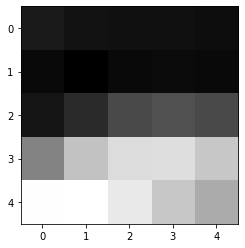

In [21]:
image = cv2.imread('IMG_2047.png', cv2.IMREAD_GRAYSCALE)

x, y =  69,  938

# the 5x5 patch
patch = image[x-2:x+3, y-2:y+3]

plt.imshow(patch, cmap='gray')
plt.show()


### Manual Canny Edge Detection

Manual Canny Edge Detection works by first smoothing the image to reduce noise, then finding the gradients of the image intensity, and finally applying non-maximum sppression and edge tracking by hysteresis to detect and connect edges. 

#### Step 1: Gaussian Blur

**Mathematical Formulation**:
The Gaussian blur is applied using a Gaussian kernel, which smooths the image to reduce noise and detail. The 2D Gaussian function is given by:

\[ G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}} \]

Here, \(\sigma\) is the standard deviation of the Gaussian distribution, influencing the amount of smoothing.

**Code Implementation**:
```python
blurred = cv2.GaussianBlur(patch, (3, 3), 1.4)
```
- `cv2.GaussianBlur()` applies a Gaussian blur.
- `(3, 3)` specifies the size of the kernel. A 3x3 kernel is often sufficient for small images or patches.
- `1.4` is the standard deviation in the X and Y directions.

#### Step 2: Gradient Calculation Using Sobel Operators

**Mathematical Formulation**:
Sobel operators are used to approximate the derivatives of the image intensity function for x and y directions, helping to highlight regions of high spatial frequency that correspond to edges:

- **Sobel X**:
\[ G_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} \]

- **Sobel Y**:
\[ G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} \]

These kernels are convolved with the image to get the first derivative in horizontal and vertical directions.

**Code Implementation**:
```python
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(sobelx**2 + sobely**2)
angle = np.arctan2(sobely, sobelx) * (180 / np.pi) % 180
```
- `cv2.Sobel()` computes the response of the Sobel kernel in both x and y directions.
- `cv2.CV_64F` specifies the data type for output image depth.
- `magnitude` calculates the Euclidean distance from the origin in the gradient vector field.
- `angle` determines the direction of the gradient.

#### Step 3: Non-Maximum Suppression

**Mathematical Formulation**:
In non-maximum suppression, the pixel for edge is only considered as it is the maximum compared to its neighbors along the direction of the gradient:

\[ \text{if } (M[i, j] \geq M[\text{neighbor1}] \text{ and } M[i, j] \geq M[\text{neighbor2}]) \]
\[ \text{then } \text{suppressed}[i, j] = M[i, j] \]
\[ \text{else } \text{suppressed}[i, j] = 0 \]

**Code Implementation**:
```python
for i in range(1, M-1):
    for j in range(1, N-1):
        # Angle quantization and comparison with neighbors
        if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
            suppressed[i, j] = magnitude[i, j]
        else:
            suppressed[i, j] = 0
```
- This loop iterates through each pixel, compares it with the neighbors determined by the gradient direction, and suppresses the value if it is not the local maximum.

#### Step 4: Hysteresis Thresholding

**Mathematical Formulation**:
This step uses two thresholds to classify pixels:
- **Strong edges** are set directly if the pixel value is above the high threshold.
- **Weak edges** are set if the pixel value is above the low threshold and connected to a strong edge.

**Code Implementation**:
```python
T1, T2 = np.max(suppressed) * 0.1, np.max(suppressed) * 0.2
for i in range(1, M-1):
    for j in range(1, N-1):
        if suppressed[i, j] >= T2:
            edges[i, j] = 255
        elif suppressed[i

, j] >= T1:
            if np.max(suppressed[i-1:i+2, j-1:j+2]) == 255:
                edges[i, j] = 255
```
- `T1` and `T2` are thresholds set relative to the maximum value in `suppressed`.
- Pixels above `T2` are marked as strong edges.
- Pixels above `T1` and connected to strong edges are also considered as edges.

This series of steps, as implemented in the code, manually performs operations analogous to Canny edge detection, resulting in a binary image that highlights the significant edges within the original 5x5 patch.

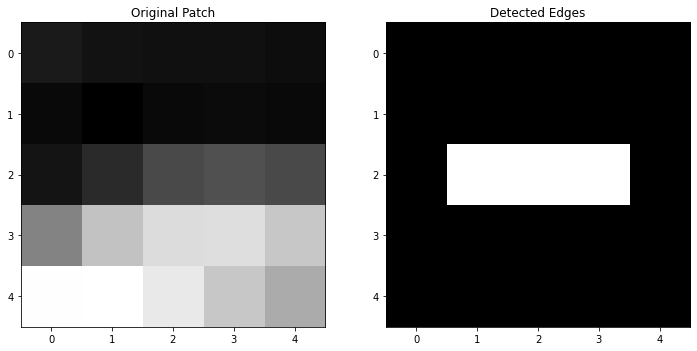

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_canny(patch):
    # Step 1: Gaussian Blur
    blurred = cv2.GaussianBlur(patch, (3, 3), 1.4)
    
    # Step 2: Calculate gradients using Sobel operators
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    angle = np.arctan2(sobely, sobelx) * (180 / np.pi) % 180
    
    # Step 3: Non-maximum suppression
    M, N = magnitude.shape
    suppressed = np.zeros((M, N), dtype=np.float32)
    
    for i in range(1, M-1):
        for j in range(1, N-1):
            # Check neighbors in the gradient direction
            q = 255
            r = 255
            
            # Angle quantization into four directions
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            elif (22.5 <= angle[i, j] < 67.5):
                q = magnitude[i+1, j-1]
                r = magnitude[i-1, j+1]
            elif (67.5 <= angle[i, j] < 112.5):
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]
            elif (112.5 <= angle[i, j] < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]
            
            if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
                suppressed[i, j] = magnitude[i, j]
            else:
                suppressed[i, j] = 0
    
    # Step 4: Hysteresis Thresholding
    T1, T2 = np.max(suppressed) * 0.1, np.max(suppressed) * 0.2  # Relative thresholds
    edges = np.zeros((M, N), dtype=np.uint8)
    
    for i in range(1, M-1):
        for j in range(1, N-1):
            if suppressed[i, j] >= T2:
                edges[i, j] = 255
            elif suppressed[i, j] >= T1:
                if np.max(suppressed[i-1:i+2, j-1:j+2]) == 255:
                    edges[i, j] = 255
    
    return edges

# Load the image
image = cv2.imread('IMG_2047.png', cv2.IMREAD_GRAYSCALE)

x, y = 69,  938

# Extract the 5x5 patch
patch = image[x-2:x+3, y-2:y+3]

# Apply the manual Canny edge detection on the patch
edges_detected = manual_canny(patch)

# Display the original patch and the edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(patch, cmap='gray')
plt.title('Original Patch')
plt.subplot(1, 2, 2)
plt.imshow(edges_detected, cmap='gray')
plt.title('Detected Edges')
plt.show()


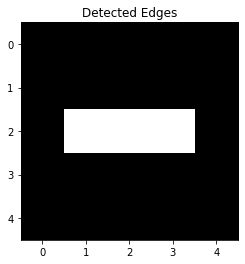

Edge pixels (relative to the 5x5 patch): [(2, 1), (2, 2), (2, 3)]


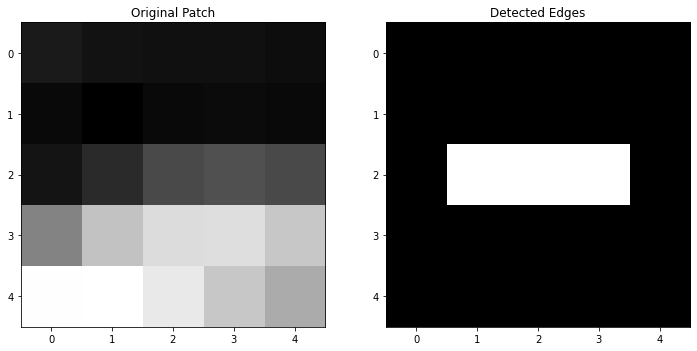

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_canny(patch):
    # Gaussian Blur
    blurred = cv2.GaussianBlur(patch, (3, 3), 1.4)
    
    # Gradient calculations
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    angle = np.arctan2(sobely, sobelx) * (180 / np.pi) % 180
    
    # Non-maximum suppression
    M, N = magnitude.shape
    suppressed = np.zeros((M, N), dtype=np.float32)
    for i in range(1, M-1):
        for j in range(1, N-1):
            q = 255
            r = 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            elif (22.5 <= angle[i, j] < 67.5):
                q = magnitude[i+1, j-1]
                r = magnitude[i-1, j+1]
            elif (67.5 <= angle[i, j] < 112.5):
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]
            elif (112.5 <= angle[i, j] < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]

            if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
                suppressed[i, j] = magnitude[i, j]
            else:
                suppressed[i, j] = 0

    # Hysteresis Thresholding
    T1, T2 = np.max(suppressed) * 0.1, np.max(suppressed) * 0.2
    edges = np.zeros((M, N), dtype=np.uint8)
    edge_pixels = []  # List to store edge coordinates

    for i in range(1, M-1):
        for j in range(1, N-1):
            if suppressed[i, j] >= T2:
                edges[i, j] = 255
                edge_pixels.append((i, j))
            elif suppressed[i, j] >= T1:
                if np.max(suppressed[i-1:i+2, j-1:j+2]) == 255:
                    edges[i, j] = 255
                    edge_pixels.append((i, j))

    return edges, edge_pixels

# Load the image
image = cv2.imread('IMG_2047.png', cv2.IMREAD_GRAYSCALE)

# Suppose you've determined x, y manually or via some preprocessing
x, y = 69,  938

# Extract the 5x5 patch
patch = image[x-2:x+3, y-2:y+3]

# Apply the manual Canny edge detection on the patch
edges_detected, edge_pixels = manual_canny(patch)

# Display the results
plt.imshow(edges_detected, cmap='gray')
plt.title('Detected Edges')
plt.show()

# Print the edge pixels
print("Edge pixels (relative to the 5x5 patch):", edge_pixels)


# Display the original patch and the edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(patch, cmap='gray')
plt.title('Original Patch')
plt.subplot(1, 2, 2)
plt.imshow(edges_detected, cmap='gray')
plt.title('Detected Edges')
plt.show()




### Canny Edge Detection using OpenCV and Comparison

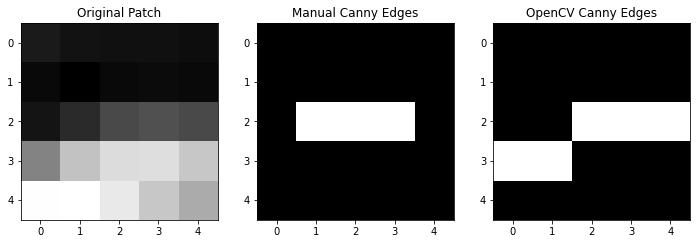

Manual Canny Edge Pixels (relative to the 5x5 patch): [(2, 1), (2, 2), (2, 3)]
OpenCV Canny Edge Pixels (relative to the 5x5 patch): [(2, 2), (2, 3), (2, 4), (3, 0), (3, 1)]


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_canny(patch):
    # Gaussian Blur
    blurred = cv2.GaussianBlur(patch, (3, 3), 1.4)
    
    # Gradient calculations
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    angle = np.arctan2(sobely, sobelx) * (180 / np.pi) % 180
    
    # Non-maximum suppression
    M, N = magnitude.shape
    suppressed = np.zeros((M, N), dtype=np.float32)
    for i in range(1, M-1):
        for j in range(1, N-1):
            q = 255
            r = 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            elif (22.5 <= angle[i, j] < 67.5):
                q = magnitude[i+1, j-1]
                r = magnitude[i-1, j+1]
            elif (67.5 <= angle[i, j] < 112.5):
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]
            elif (112.5 <= angle[i, j] < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]

            if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
                suppressed[i, j] = magnitude[i, j]
            else:
                suppressed[i, j] = 0

    # Hysteresis Thresholding
    T1, T2 = np.max(suppressed) * 0.1, np.max(suppressed) * 0.2
    edges = np.zeros((M, N), dtype=np.uint8)
    edge_pixels = []  # List to store edge coordinates
    for i in range(1, M-1):
        for j in range(1, N-1):
            if suppressed[i, j] >= T2:
                edges[i, j] = 255
                edge_pixels.append((i, j))
            elif suppressed[i, j] >= T1:
                if np.max(suppressed[i-1:i+2, j-1:j+2]) == 255:
                    edges[i, j] = 255
                    edge_pixels.append((i, j))
    return edges, edge_pixels

# Load the image and select the patch
image = cv2.imread('IMG_2047.png', cv2.IMREAD_GRAYSCALE)
x, y = 69,  938
patch = image[x-2:x+3, y-2:y+3]

# Perform manual Canny edge detection
edges_manual, edge_pixels_manual = manual_canny(patch)

# Perform OpenCV Canny edge detection
threshold1 = 100  # These thresholds need to be tuned for your specific case
threshold2 = 200
edges_opencv = cv2.Canny(patch, threshold1, threshold2)
edge_pixels_opencv = [(i, j) for i in range(edges_opencv.shape[0]) for j in range(edges_opencv.shape[1]) if edges_opencv[i, j] != 0]

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(patch, cmap='gray')
plt.title('Original Patch')
plt.subplot(1, 3, 2)
plt.imshow(edges_manual, cmap='gray')
plt.title('Manual Canny Edges')
plt.subplot(1, 3, 3)
plt.imshow(edges_opencv, cmap='gray')
plt.title('OpenCV Canny Edges')
plt.show()

# Print the edge pixels
print("Manual Canny Edge Pixels (relative to the 5x5 patch):", edge_pixels_manual)
print("OpenCV Canny Edge Pixels (relative to the 5x5 patch):", edge_pixels_opencv)


## Question_2


 2. Pick any image frame from the 10 sec video footage. Pick a region of interest in the image
 making sure there is a CORNER in that region. Pick a 5 x 5 image patch in that region that
 constitutes the edge. Perform the steps of HARRIS CORNER DETECTION manually and note
 the pixels that correspond to the CORNER. Compare the outcome with MATLAB or OpenCV or
 DepthAI’s Harris corner detection function.

Selected a patch that includes corner, as below.

#### Estimation of corners

In [26]:
import cv2
import numpy as np

image = cv2.imread('IMG_2047.png', cv2.IMREAD_GRAYSCALE)

dst = cv2.cornerHarris(image, 2, 3, 0.04)
dst = cv2.dilate(dst, None)  

corners = np.where(dst > 0.01 * dst.max())
corners

(array([  70,   70,   70, ..., 1870, 1870, 1870], dtype=int64),
 array([ 945,  946,  947, ..., 1152, 1153, 1154], dtype=int64))

#### Selecting a Patch

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

x, y = 70 , 947  # Example coordinates
corner_patch = image[x-2:x+3, y-2:y+3]


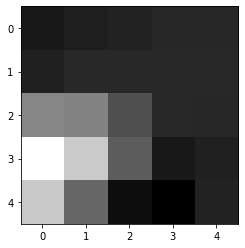

In [30]:
plt.imshow(corner_patch, cmap='gray')
plt.show()

#### Step 1: Gradient Calculation 

The first step involves calculating the image gradients in the x and y directions. Gradients are changes in intensity across the image and are critical for detecting edges, which are essential components of corners.

- **Sobel Operator**: I used the Sobel operator to compute the first derivatives in the horizontal (x) and vertical (y) directions. This operator provides a pair of 3x3 convolution kernels which are applied to the image to get gradients:
  \[
  G_x = \begin{bmatrix}
  -1 & 0 & 1 \\
  -2 & 0 & 2 \\
  -1 & 0 & 1
  \end{bmatrix} \quad \text{and} \quad G_y = \begin{bmatrix}
  -1 & -2 & -1 \\
   0 &  0 &  0 \\
   1 &  2 &  1
  \end{bmatrix}
  \]
- **Gradient Maps**: Applying these kernels to the image \( I \) results in two gradient maps, \( G_x \) and \( G_y \), representing the rate of change of image brightness in the horizontal and vertical directions, respectively.

In [11]:
sobelx = cv2.Sobel(corner_patch, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(corner_patch, cv2.CV_64F, 0, 1, ksize=3)


#### Step 2: Structure Tensor Setup

The structure tensor, also known as the second-moment matrix, is a 2x2 matrix that combines the gradients to describe the local structure of the image.

- **Products of Derivatives**: Compute the products of the derivatives: \( Ix^2 \) (squared gradient in the x-direction), \( Iy^2 \) (squared gradient in the y-direction), and \( Ixy \) (product of gradients in x and y directions).
- **Gaussian Filtering**: Apply a Gaussian filter to these products to compute the sums of the products over a window centered at each pixel. This step smooths the contribution of the gradients over a small neighborhood, which stabilizes the detection against noise and minor variations:
  \[
  S = G * \begin{bmatrix} Ix^2 & Ixy \\ Ixy & Iy^2 \end{bmatrix}
  \]
  where \( G \) is the Gaussian filter and \( * \) denotes convolution.

In [31]:
Ix2 = sobelx**2
Iy2 = sobely**2
Ixy = sobelx * sobely

# Gaussian filter for summing within a window
Ix2 = cv2.GaussianBlur(Ix2, (3, 3), sigmaX=1)
Iy2 = cv2.GaussianBlur(Iy2, (3, 3), sigmaX=1)
Ixy = cv2.GaussianBlur(Ixy, (3, 3), sigmaX=1)

#### Step 3: Corner Response Calculation

The Harris corner response \( R \) at each pixel is calculated using the determinant and trace of the structure tensor \( S \).

- **Determinant and Trace**: 
  \[
  \text{det}(S) = Ix^2 \cdot Iy^2 - Ixy^2, \quad \text{trace}(S) = Ix^2 + Iy^2
  \]
- **Harris Response**: 
  \[
  R = \text{det}(S) - k \cdot (\text{trace}(S))^2
  \]
  Here, \( k \) is an empirically determined sensitivity factor, typically around 0.04 to 0.06. This response measures the likelihood of a pixel being a corner based on the eigenvalues of \( S \).

In [32]:
k = 0.04
detM = Ix2 * Iy2 - Ixy**2
traceM = Ix2 + Iy2

R = detM - k * traceM**2


#### Step 4: Thresholding for Corner Detection

Finally, to determine which pixels are corners:
- **Thresholding**: Apply a threshold to the Harris response \( R \). Pixels where \( R \) exceeds this threshold are marked as corners.
- **Non-Maximum Suppression**: Often, an additional step of non-maximum suppression is applied to ensure that the detected corners are localized to the most significant response in their neighborhood.

In [33]:
corner_response_threshold = 0.01 * R.max()
corner_map = (R > corner_response_threshold) * 255


#### Step 5: Display Results
Visualize the corners on the patch:

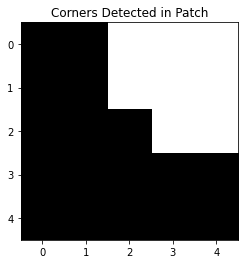

In [34]:
plt.imshow(corner_map, cmap='gray')
plt.title('Corners Detected in Patch')

plt.show()


In [38]:
def note_corner_pixels(R, threshold):
    corner_pixels = []
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if R[i, j] > threshold:
                corner_pixels.append((i, j))
    return corner_pixels

threshold = 0.01 * np.max(R)

corner_pixels = note_corner_pixels(R, threshold)

# the coordinates of the corner pixels
print("Corner pixels:", corner_pixels)


Corner pixels: [(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4)]


### Harris Corner Detection using OpenCV and Comparison

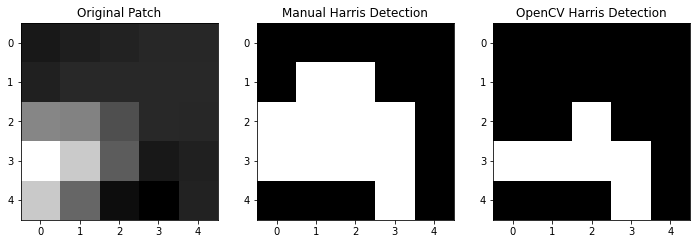

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_harris_corner_detection(corner_patch, k=0.04):
    # Gradient calculations
    sobelx = cv2.Sobel(corner_patch, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(corner_patch, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate products of derivatives
    Ix2 = sobelx**2
    Iy2 = sobely**2
    Ixy = sobelx * sobely

    # Gaussian filter for summing within a window
    Ix2 = cv2.GaussianBlur(Ix2, (3, 3), 1)
    Iy2 = cv2.GaussianBlur(Iy2, (3, 3), 1)
    Ixy = cv2.GaussianBlur(Ixy, (3, 3), 1)

    # Harris response calculation
    detM = Ix2 * Iy2 - Ixy**2
    traceM = Ix2 + Iy2
    R = detM - k * traceM**2
    return R

def apply_threshold(R, threshold):
    corner_map = R > threshold * np.max(R)
    return corner_map

# Manual Harris Corner Detection
R_manual = manual_harris_corner_detection(corner_patch)
corner_map_manual = apply_threshold(R_manual, 0.01)

# OpenCV Harris Corner Detection
dst = cv2.cornerHarris(corner_patch, 2, 3, 0.04)
corner_map_opencv = apply_threshold(dst, 0.01)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(corner_patch, cmap='gray')
plt.title('Original Patch')
plt.subplot(1, 3, 2)
plt.imshow(corner_map_manual, cmap='gray')
plt.title('Manual Harris Detection')
plt.subplot(1, 3, 3)
plt.imshow(corner_map_opencv, cmap='gray')
plt.title('OpenCV Harris Detection')
plt.show()


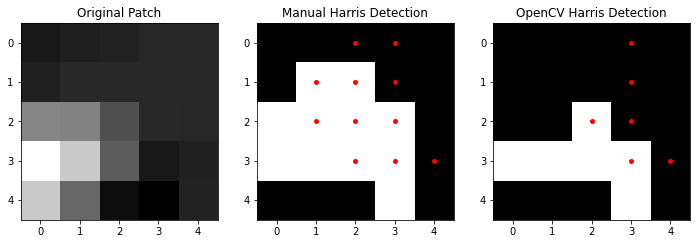

Manual Detection Corner pixels (relative to the patch): [[1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [4 3]]
OpenCV Detection Corner pixels (relative to the patch): [[2 2]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [4 3]]


In [37]:

def apply_threshold(R, threshold_ratio):
    threshold = threshold_ratio * np.max(R)
    corner_map = R > threshold
    return corner_map, np.argwhere(corner_map)

# Manual Harris Corner Detection
R_manual = manual_harris_corner_detection(corner_patch)
corner_map_manual, corners_manual = apply_threshold(R_manual, 0.01)

# OpenCV Harris Corner Detection
dst = cv2.cornerHarris(corner_patch, 2, 3, 0.04)
corner_map_opencv, corners_opencv = apply_threshold(dst, 0.01)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(corner_patch, cmap='gray')
plt.title('Original Patch')
plt.subplot(1, 3, 2)
plt.imshow(corner_map_manual, cmap='gray')
plt.title('Manual Harris Detection')
plt.scatter(*zip(*corners_manual), color='red', s=15)
plt.subplot(1, 3, 3)
plt.imshow(corner_map_opencv, cmap='gray')
plt.title('OpenCV Harris Detection')
plt.scatter(*zip(*corners_opencv), color='red', s=15)
plt.show()

print("Manual Detection Corner pixels (relative to the patch):", corners_manual)
print("OpenCV Detection Corner pixels (relative to the patch):", corners_opencv)


## Question_3


3. Consider an image pair from your footage where the images are separated by at least 2
seconds. Also ensure there is at least some overlap of scenes in the two images.
a. Pick a pixel (super-pixel patch as discussed in class) on image 1 and a corresponding
pixel ((super-pixel patch as discussed in class)) on image 2 (the pixel on image 2 that
corresponds to the same object area on image 1). Compute the SIFT feature for each of
these 2 patches. Compute the sum of squared difference (SSD) value between the SIFT
vector for these two pixels. Use MATLAB or Python or C++ implementation -- The
MATLAB code for SIFT feature extraction and matching can be downloaded from here:
https://www.cs.ubc.ca/~lowe/keypoints/ (Please first read the ReadMe document in the
folder to find instructions to execute the code).
b. Compute the Homography matrix between these two images using MATLAB or Python
or C++ implementation. Compute its inverse.
You can make assumptions as necessary, however, justify them in your answers/description.

#### Part (a): SIFT Feature Extraction and SSD Calculation

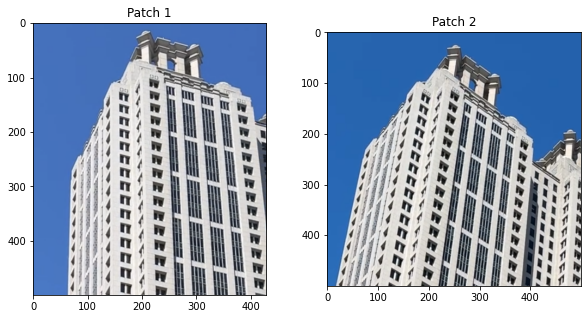

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1_path = 'Q_3_1.png'
image2_path = 'Q_3_3.png'

# Load images
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

x1, y1 = 1000, 300  # for image 1
x2, y2 = 450, 250  # estimated corresponding coordinates for image 2

# Define the size of your super-pixel patch
size = 500  # Placeholder size

# Extract the super-pixel patches
patch1 = image1[y1-size//2:y1+size//2, x1-size//2:x1+size//2]
patch2 = image2[y2-size//2:y2+size//2, x2-size//2:x2+size//2]

# Convert BGR to RGB for matplotlib
patch1_rgb = cv2.cvtColor(patch1, cv2.COLOR_BGR2RGB)
patch2_rgb = cv2.cvtColor(patch2, cv2.COLOR_BGR2RGB)

# Display the patches using matplotlib
plt.figure(figsize=(10, 5))

# Display patch1
plt.subplot(1, 2, 1)
plt.imshow(patch1_rgb)
plt.title('Patch 1')

# Display patch2
plt.subplot(1, 2, 2)
plt.imshow(patch2_rgb)
plt.title('Patch 2')

plt.show()


In [13]:

# Initialize SIFT detector with adjusted contrast threshold and edge threshold
sift = cv2.SIFT_create(contrastThreshold=0.04, edgeThreshold=10)

# Detect SIFT features and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(patch1, None)
keypoints2, descriptors2 = sift.detectAndCompute(patch2, None)

# Checking if descriptors were found 
if descriptors1 is not None and descriptors2 is not None and descriptors1.size and descriptors2.size:
    # Compute SSD between the first descriptor in each image
    ssd = np.sum((descriptors1[0] - descriptors2[0]) ** 2)
    print("SSD between SIFT descriptors:", ssd)
else:
    print("Descriptors not found in one of the patches")

# Optionally, visualize the patches with keypoints
if keypoints1 and keypoints2:
    patch1_keypoints = cv2.drawKeypoints(patch1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    patch2_keypoints = cv2.drawKeypoints(patch2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display the patches with keypoints
    cv2.imshow("Patch 1 Keypoints", patch1_keypoints)
    cv2.imshow("Patch 2 Keypoints", patch2_keypoints)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


SSD between SIFT descriptors: 174669.0


#### Part (b): Homography and Its Inverse

In [4]:
import cv2
import numpy as np

# Load images
image1 = cv2.imread('Q_3_1.png')
image2 = cv2.imread('Q_3_3.png')

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# FLANN parameters and matcher
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(descriptors1, descriptors2, k=2)

matchesMask = [[0,0] for i in range(len(matches))]

# Ratio test 
good = []
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i] = [1,0]
        good.append(m)

if len(good) >= 4:
    src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    print("Homography matrix:\n", H)
    
    # Compute the inverse of the homography matrix
    H_inv = np.linalg.inv(H)
    print("Inverse Homography matrix:\n", H_inv)
else:
    print("Not enough matches are found - %d/%d" % (len(good), 4))



Homography matrix:
 [[ 1.31285617e+00 -2.61091176e-01 -6.32913832e+02]
 [ 5.18478901e-01  1.22724873e+00 -5.24534523e+02]
 [ 2.96286535e-04 -8.22788215e-06  1.00000000e+00]]
Inverse Homography matrix:
 [[ 6.07119324e-01  1.32202751e-01  4.53599125e+02]
 [-3.34550239e-01  7.44856635e-01  1.78961546e+02]
 [-1.82633921e-04 -3.30413023e-05  8.67077162e-01]]


### Question_4


4. Implement an application that will compute and display the INTEGRAL image feed along with
the RGB feed. You cannot use a built-in function such as “output = integral_image(input)”

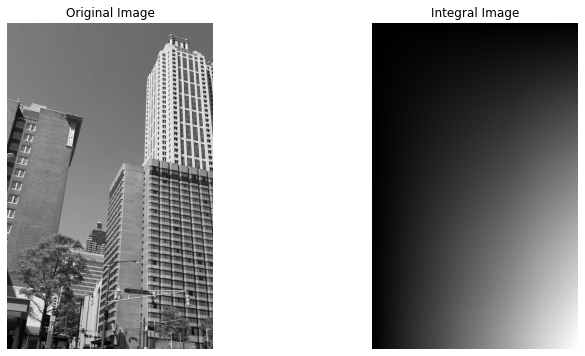

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_integral_image(img):

    img = img.astype(np.float32)
    # Create an array for the integral image with an extra row and column filled with zeros
    integral_img = np.zeros((img.shape[0] + 1, img.shape[1] + 1), dtype=np.float32)
    
    # Compute the integral image
    for x in range(1, integral_img.shape[0]):
        for y in range(1, integral_img.shape[1]):
            integral_img[x, y] = img[x-1, y-1] \
                                 + integral_img[x-1, y] \
                                 + integral_img[x, y-1] \
                                 - integral_img[x-1, y-1]
    return integral_img[1:, 1:]  # Return the integral image excluding the extra row and column

def main():
    # Load an image
    img = cv2.imread('IMG_2047.png')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Compute the integral image
    integral_img = compute_integral_image(img_gray)

    # Display the original and the integral image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Integral Image')
    plt.imshow(integral_img, cmap='gray')
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()


### Question_5


5. Implement the image stitching for a 360 degree panoramic output. This should function in
real-time. You can use any type of features. You can use built-in libraries/tools provided by
OpenCV or DepthAI API. You cannot use any built-in function that does output =
image_stitch(image1, image2). You are supposed to implement the image_stitch() function

In [1]:
import cv2
import numpy as np

def image_stitch(images):
    # Convert images to grayscale
    grayscales = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Detect features and compute descriptors for all images
    keypoints_all = []
    descriptors_all = []
    for gray in grayscales:
        keypoints, descriptors = sift.detectAndCompute(gray, None)
        keypoints_all.append(keypoints)
        descriptors_all.append(descriptors)
    
    # Feature matching using FLANN matcher
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Assuming we have pairwise matching; for a 360 stitch, we should loop around
    matches_all = []
    for i in range(len(images) - 1):
        matches = flann.knnMatch(descriptors_all[i], descriptors_all[i + 1], k=2)
        # Lowe's ratio test
        good_matches = [m for m, n in matches if m.distance < 0.7 * n.distance]
        matches_all.append(good_matches)
    
    # Homography estimation using RANSAC
    homographies = []
    for i, matches in enumerate(matches_all):
        src_pts = np.float32([keypoints_all[i][m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints_all[i + 1][m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
        H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        homographies.append(H)
    
    # Warp images to a common plane
    warped_images = [images[0]]  # first image remains unwarped
    for i, H in enumerate(homographies):
        height, width = images[0].shape[:2]
        warped_image = cv2.warpPerspective(images[i + 1], H, (width, height))
        warped_images.append(warped_image)
    
    # Blend the images together (a simple approach here using averaging)
    panorama = warped_images[0]
    for warped_image in warped_images[1:]:
        # Simple averaging for overlapping regions
        panorama = np.where(panorama == 0, warped_image, (panorama + warped_image) / 2).astype(np.uint8)
    
    return panorama



In [5]:
# Load the images
image1 = cv2.imread('Q_3_1.png')
image2 = cv2.imread('Q_3_2.png')
image3 = cv2.imread('Q_3_3.png')

if image1 is None or image2 is None or image3 is None:
    raise ValueError("One of the images didn't load correctly. Check the file paths.")

panoramic_image = image_stitch([image1, image2, image3])

if panoramic_image is not None:
    # Save the result 
    cv2.imwrite('Q_5_Panoramic_Image.jpg', panoramic_image)
else:
    print("Failed to stitch images.")


### Question_6


6. Integrate the applications developed for problems 4 and 5 with the web application developed
in Assignment 1 problem 4*